## Assignment-9 Regression Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [35]:
df  = pd.read_csv('Student_Marks - Sheet1.csv') 

In [36]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
126,3,6.335,32.357
127,3,0.301,5.609
128,4,7.163,41.444
129,7,0.309,12.027


In [37]:
df.describe()

,number_courses,time_study,Marks
count,131.000000,127.000000,122.000000
mean,5.251908,3.880661,23.427475
std,1.820159,2.340316,13.812173
min,2.000000,0.096000,5.609000
25%,4.000000,1.968000,12.151250
50%,5.000000,3.919000,19.680500
75%,7.000000,6.103000,32.076750
max,8.000000,7.957000,55.299000


In [38]:
df.isna().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

In [39]:
df.isna().any()

number_courses    False
time_study         True
Marks              True
dtype: bool

In [40]:
df['time_study'].isna().sum()

4

In [41]:
df['time_study'].fillna(df['time_study'].mean(),inplace = True)

In [42]:
df['Marks'].isna().sum()

9

In [43]:
df['Marks'].fillna(df['Marks'].median(),inplace = True)

In [44]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [45]:
bar_data = pd.DataFrame(df['number_courses'].value_counts()).reset_index()

<AxesSubplot:>

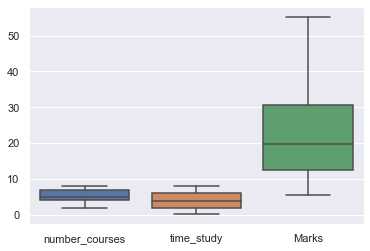

In [46]:
sns.boxplot(data = df)

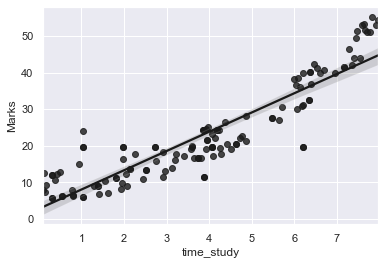

In [47]:
sns.regplot(data = df,x = 'time_study',y = 'Marks',color='k')
plt.show()

## Simple Linear Regression

In [48]:
x1_simple = df['time_study']
y_simple = df['Marks']

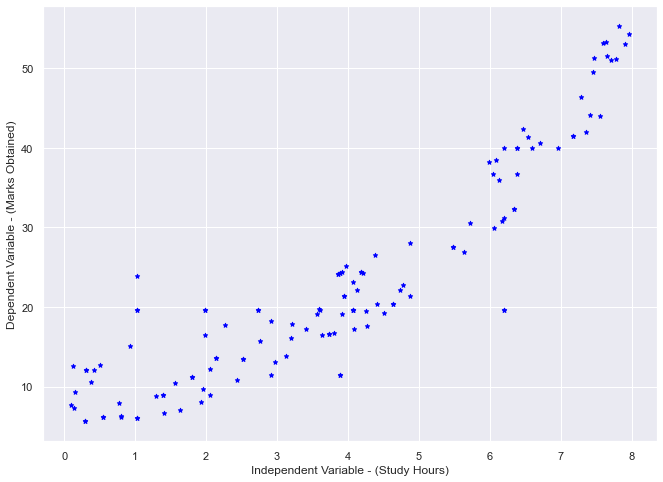

In [49]:
fig,axes = plt.subplots(figsize = (11,8))
plt.scatter(x1_simple,y_simple,s=20,c='blue',marker='*')
plt.xlabel('Independent Variable - (Study Hours)')
plt.ylabel('Dependent Variable - (Marks Obtained)')
plt.show()

<AxesSubplot:>

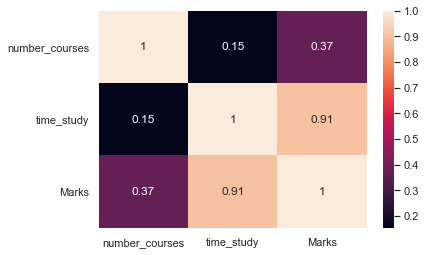

In [50]:
sns.heatmap(df.corr(), annot=True)

In [51]:
x=x1_simple.values.reshape(-1,1)
y=y_simple.values.reshape(-1,1)

reg=LinearRegression()

reg.fit(x,y)
y_pred=reg.predict(x)


In [52]:
df_2 = df.copy()
df_2['Pred'] = y_pred

In [53]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2736.
Date:                Sun, 01 May 2022   Prob (F-statistic):                    3.46e-89
Time:                        11:05:00   Log-Likelihood:                         -413.67
No. Observations:                 131   AIC:                                      829.3
Df Residuals:                     130   BIC:                                      832.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

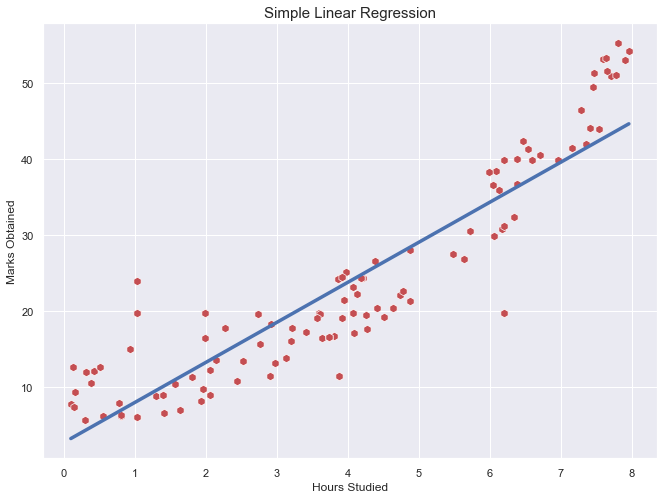

In [54]:
fig,ax = plt.subplots(figsize = (11,8))
ax1 = sns.scatterplot(x = 'time_study', y = 'Marks', data = df, s = 70, color = 'r', marker = 'h')
sns.lineplot(x = 'time_study' ,y = 'Pred',data = df_2, ax=ax1,linewidth = 3.5) 
plt.xlabel("Hours Studied", fontsize= 12)
plt.ylabel("Marks Obtained", fontsize= 12)
plt.title("Simple Linear Regression", fontsize= 15)
plt.show()

## Polynomial Regression

In [55]:
X = df[['time_study']]
y = df['Marks']

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [57]:
pol_reg.coef_

array([ 0.        , -0.52344142,  0.73045255])

In [58]:
pol_reg.intercept_

10.353029310207125

In [59]:
x = np.arange(0,9)
equation = 0.7305*(x**2) -0.5234*(x) + 10.35
equation

array([10.35  , 10.5571, 12.2252, 15.3543, 19.9444, 25.9955, 33.5076,
       42.4807, 52.9148])

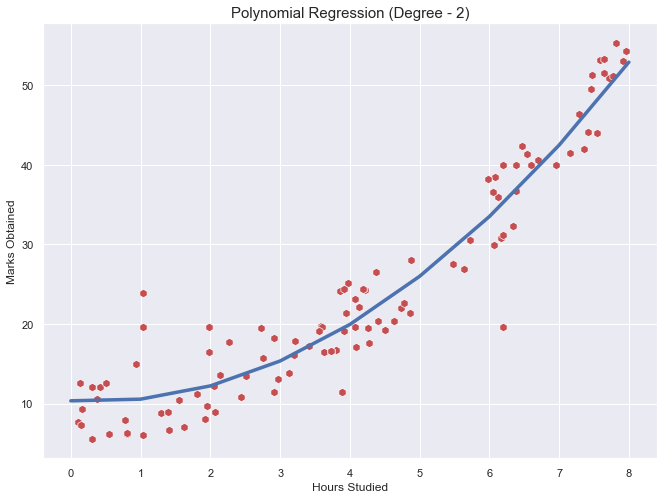

In [60]:
fig,ax = plt.subplots(figsize = (11,8))
ax1 = sns.scatterplot(x = 'time_study', y = 'Marks', data = df, s = 70, color = 'r', marker = 'h')
sns.lineplot(x = np.arange(0,9) ,y = equation, ax=ax1,linewidth = 3.5) 
plt.xlabel("Hours Studied", fontsize= 12)
plt.ylabel("Marks Obtained", fontsize= 12)
plt.title("Polynomial Regression (Degree - 2)", fontsize= 15)
plt.show()